In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Alcantarilla

In [2]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2,SO2_lag1,SO2_lag2
0,237.0,79.8,0,5.164541e-02,8.0,54.0,66.0,18.0,14.0,1.0,...,92.0,10.0,10.0,19.0,70.0,98.0,28.0,11.0,4.0,4.0
1,233.0,67.0,1,5.379729e-02,3.0,29.0,33.0,38.0,10.0,1.0,...,66.0,14.0,18.0,18.0,64.0,92.0,10.0,10.0,4.0,4.0
2,300.0,64.6,2,5.594916e-02,4.0,27.0,33.0,34.0,8.0,1.0,...,33.0,10.0,38.0,8.0,54.0,66.0,14.0,18.0,4.0,4.0
3,266.0,63.8,3,5.810104e-02,4.0,19.0,25.0,38.0,7.0,1.0,...,33.0,8.0,34.0,3.0,29.0,33.0,10.0,38.0,3.0,4.0
4,339.0,58.4,4,6.025291e-02,4.0,18.0,24.0,47.0,10.0,1.0,...,25.0,7.0,38.0,4.0,27.0,33.0,8.0,34.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0,1.0,1.0
17492,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0,1.0,1.0
17493,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0,1.0,1.0
17494,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0,2.0,1.0


In [3]:
x = alc[['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour']]
y = alc[['NO (µg/m³N)']]

In [4]:
x_train = x[5000:]
y_train = y[5000:]
x_test = x[:5000]
y_test = y[:5000]

In [5]:
rf = RandomForestRegressor()

In [6]:
rf.fit(x_train,y_train)

<ipython-input-6-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [7]:
y_pred = rf.predict(x_test)
y_pred

array([7.58 , 2.7  , 3.202, ..., 1.22 , 1.274, 1.42 ])

In [8]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = rf.score(x,y)
acc = rf.score(x_test,y_test)
print('R-squared:',score,'\n','RMSE: ',rmse,'\n','Accuracy: ',acc)

R-squared: 0.9991052966554171 
 RMSE:  0.9195070957855627 
 Accuracy:  0.9965305866990544


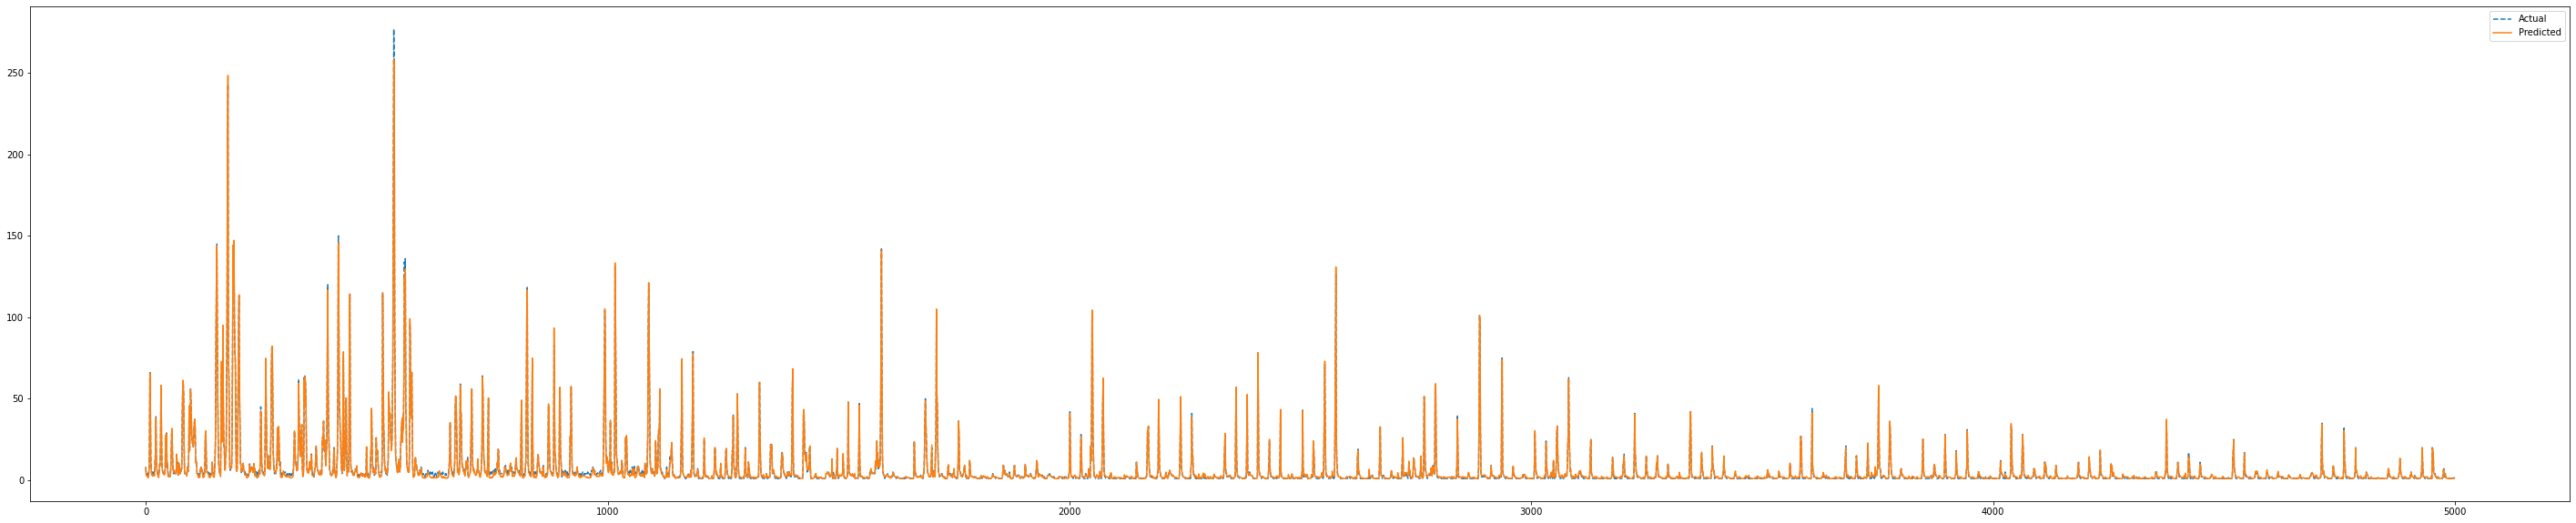

In [9]:
plt.figure(figsize=(50,10))
plt.plot(np.array(y_test),'--')
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])

In [10]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    rf.fit(x_train,y_train)  
    y_pred = rf.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = rf.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

<ipython-input-10-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NOX (µg/m³N) 
 R-squared: 0.9996816888845808 
 RMSE:  1.1498151781916952


<ipython-input-10-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO (µg/m³N) 
 R-squared: 0.9991624825379958 
 RMSE:  0.9092545333403623


<ipython-input-10-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO2 (µg/m³N) 
 R-squared: 0.9954573000176934 
 RMSE:  1.8591584713520255


<ipython-input-10-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


SO2 (µg/m³N) 
 R-squared: 0.7280270476519453 
 RMSE:  1.180284960168518


<ipython-input-10-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


O3 (µg/m³N) 
 R-squared: 0.9437096422450814 
 RMSE:  14.442051722383493


<ipython-input-10-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


PM10 (µg/m³N) 
 R-squared: 0.774189541609802 
 RMSE:  11.414635708597975


# Time Series

In [12]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2,SO2_lag1,SO2_lag2
0,237.0,79.8,0,5.164541e-02,8.0,54.0,66.0,18.0,14.0,1.0,...,92.0,10.0,10.0,19.0,70.0,98.0,28.0,11.0,4.0,4.0
1,233.0,67.0,1,5.379729e-02,3.0,29.0,33.0,38.0,10.0,1.0,...,66.0,14.0,18.0,18.0,64.0,92.0,10.0,10.0,4.0,4.0
2,300.0,64.6,2,5.594916e-02,4.0,27.0,33.0,34.0,8.0,1.0,...,33.0,10.0,38.0,8.0,54.0,66.0,14.0,18.0,4.0,4.0
3,266.0,63.8,3,5.810104e-02,4.0,19.0,25.0,38.0,7.0,1.0,...,33.0,8.0,34.0,3.0,29.0,33.0,10.0,38.0,3.0,4.0
4,339.0,58.4,4,6.025291e-02,4.0,18.0,24.0,47.0,10.0,1.0,...,25.0,7.0,38.0,4.0,27.0,33.0,8.0,34.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0,1.0,1.0
17492,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0,1.0,1.0
17493,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0,1.0,1.0
17494,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0,2.0,1.0


In [13]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'SO2_roll_mean','NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'SO2_lag1','NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2','SO2_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    rf.fit(x_train,y_train)  
    y_pred = rf.predict(x_test)
    importance = rf.feature_importances_
    for j,v in enumerate(importance):
        print(v)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = rf.score(x_test,y_test)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

<ipython-input-13-2e6d405dbd5d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.01588105989547172
0.008808030367074612
0.04048448525108343
0.010824615010337222
0.047061011230212356
0.010326370305445854
0.058823393005532125
0.005999777264280124
0.006951545371279407
0.005254062772410768
0.009096457906434192
0.007266555226514883
0.006977463252973075
0.07396807665774058
0.0549913048571878
0.5592391703661189
0.010194502448065327
0.017322148000623094
0.003627939413378969
0.0065911935243741
0.009555281146051973
0.009375938770244695
0.012997866523114451
0.0056517660962118
0.002729985337838404
NOX (µg/m³N) 
 R-squared: 0.8256662119735894 
 RMSE:  15.366283597435004


<ipython-input-13-2e6d405dbd5d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.01588103135592512
0.009342576830529407
0.03688107084792464
0.011452652953421955
0.04934940551608964
0.011197372883623337
0.06933612460679006
0.00594481220100918
0.008523301666715636
0.005652959284191205
0.010471364648354282
0.009426378405097838
0.009432940405872527
0.6003652170522362
0.011154400055027809
0.032527787969047206
0.01336017845987803
0.02369292943263213
0.004501514571818472
0.007868579574822081
0.012094571147918324
0.011322904918450038
0.020551848767926616
0.006528246324103564
0.0031398301205947687
NO (µg/m³N) 
 R-squared: 0.7685186081839996 
 RMSE:  7.510781154846678


<ipython-input-13-2e6d405dbd5d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.016354502119383482
0.012685776002957729
0.0359502244676637
0.009181219783990863
0.05966873464081596
0.007541538923388426
0.036685244625298576
0.00651431363150071
0.006286000493421969
0.005139224709681119
0.007942685277332369
0.006823462226498596
0.006530643051013172
0.0029164679835971094
0.7128901470195738
0.01317683720007738
0.006206267562589975
0.007907462957017889
0.0026768416919481335
0.002563994374256888
0.007528055028036251
0.005516727505265095
0.0067773790401259755
0.012173313513637984
0.002362936170926924
NO2 (µg/m³N) 
 R-squared: 0.8434646885226025 
 RMSE:  6.690289402649186


<ipython-input-13-2e6d405dbd5d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.014452190913424097
0.009153095437472714
0.012779189485454496
0.021116459835662515
0.011479530208505671
0.012731490213731579
0.015301188422369785
0.007825738717837044
0.009011465822594949
0.007343979476017719
0.011645420118174626
0.010281667053074964
0.019382268223876915
0.007705331627052787
0.006213691609049369
0.008848601994749787
0.010242538705832797
0.01558894007075233
0.7379425363796032
0.006281258198072735
0.007493206277606965
0.007634068389208936
0.011272348936583144
0.009185477949387639
0.009088315933903263
SO2 (µg/m³N) 
 R-squared: 0.6324062159994742 
 RMSE:  0.8284514759477467


<ipython-input-13-2e6d405dbd5d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.006117716044066072
0.0030819855632248923
0.00400925736877863
0.00306812191733593
0.05564625054833527
0.0024735839622429
0.017627391105161632
0.0023267554797045493
0.001980606264209367
0.0016069123932237117
0.002329240437084655
0.00407262923891807
0.0019878741033398217
0.001397077097603509
0.0027584441988434617
0.0019835898646618595
0.0021277881092501578
0.8743047560928083
0.0009940011449265384
0.0007287808902999624
0.001920298102583336
0.001425481851405743
0.002022242529515715
0.003010736204479388
0.000998479487996609
O3 (µg/m³N) 
 R-squared: 0.9328332322565568 
 RMSE:  8.683372484374951


<ipython-input-13-2e6d405dbd5d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.02149076017153089
0.017986187721080668
0.021404862865733808
0.01950283646513698
0.024097728434058337
0.016903248212782895
0.026411461657095455
0.01164958405089009
0.013525655153194722
0.009710198169040694
0.04790774067079582
0.018981038495758752
0.015003590468642504
0.009666054429901537
0.0171947225564804
0.01191972137709319
0.5952136318175826
0.017386057253079113
0.007573527047211659
0.005889147958038437
0.010918105831680637
0.009097795079986046
0.027257811331328863
0.015397637252046787
0.007910895529829
PM10 (µg/m³N) 
 R-squared: 0.6193506318524402 
 RMSE:  7.9392382754518716
